In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

# Import own support functions
from work.time_series.support.import_clean_data import get_data
from moving_average import plot_moving_average

### Importing the first mote temperature data from the Intel Lab Data - Dataset

More information? Follow the Link: http://db.csail.mit.edu/labdata/labdata.html

In [ ]:
data = get_data(1)

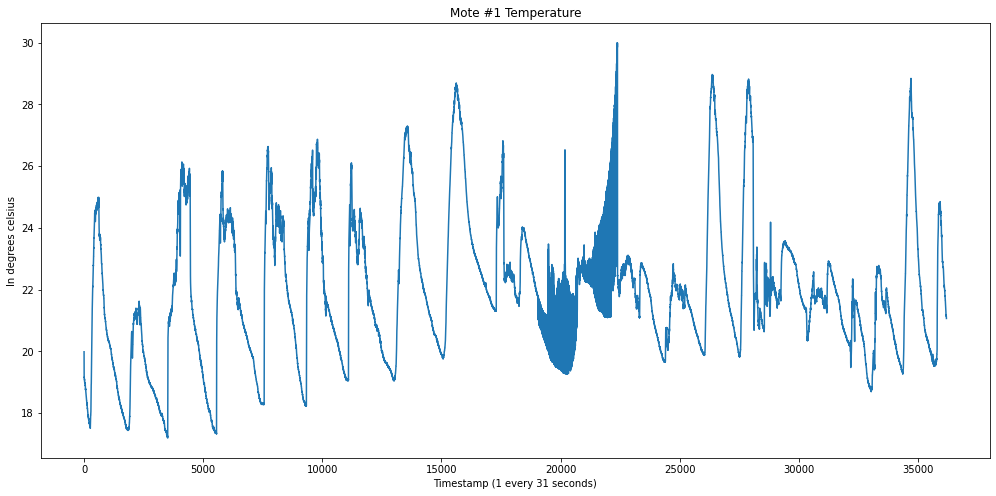

In [ ]:
plt.figure(figsize=(17, 8))
plt.plot(data)
plt.title('Mote #1 Temperature')
plt.ylabel('In degrees celsius')
plt.xlabel('Timestamp (1 every 31 seconds)')
plt.grid(False)
plt.show()

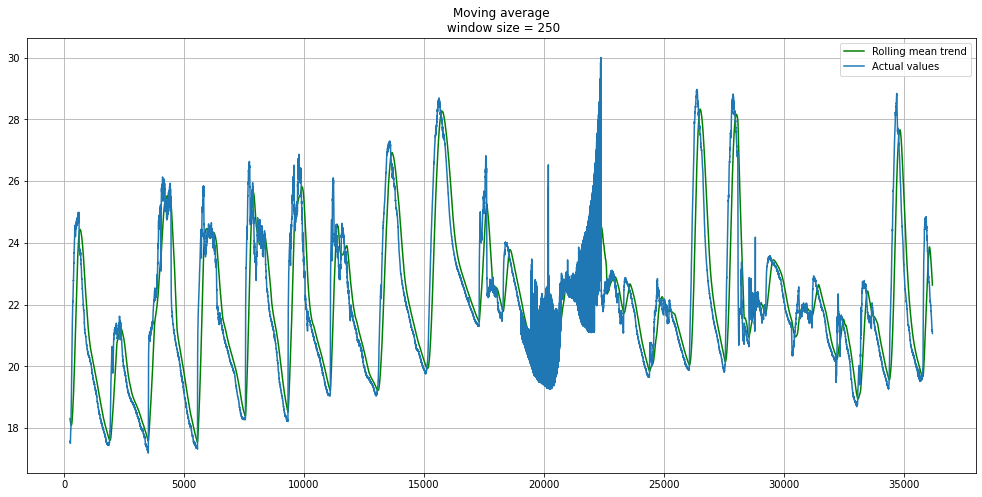

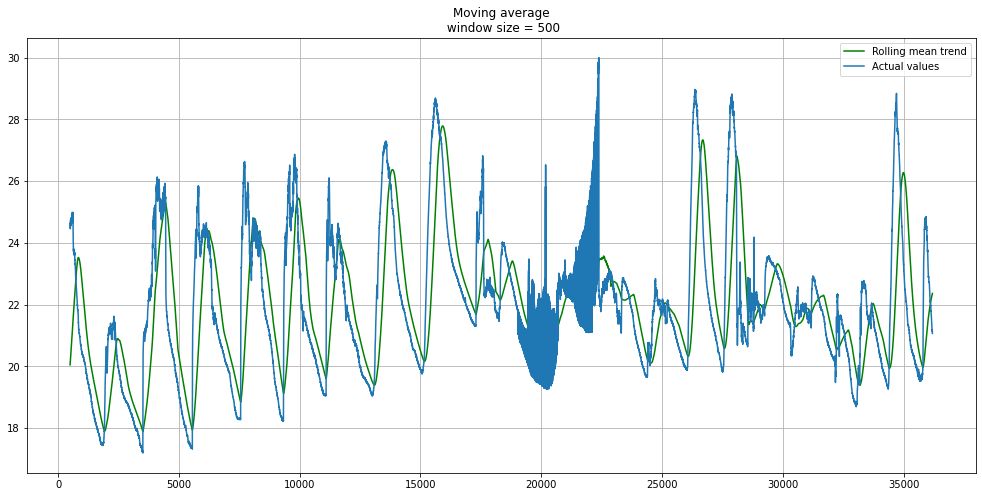

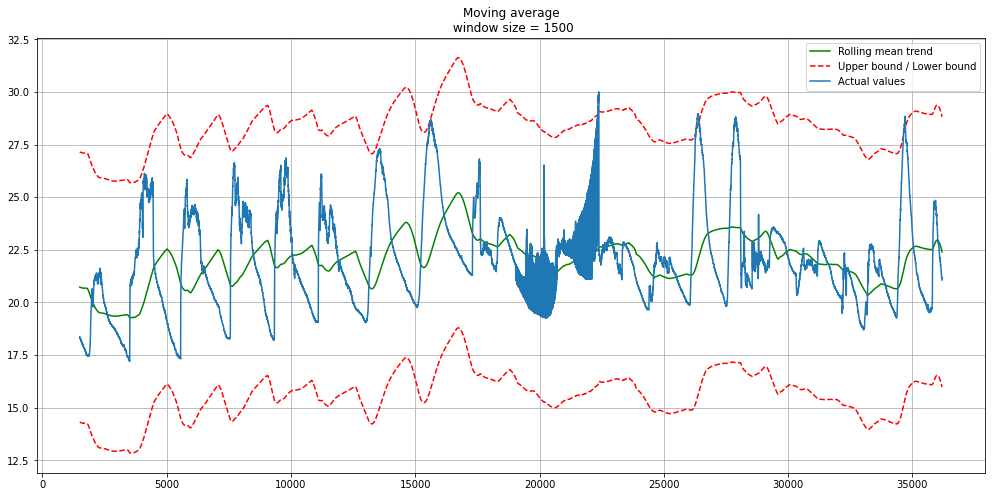

In [ ]:
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):

    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    #Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
            
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
# Smooth by the previous 250 timestamps 
plot_moving_average(data, 250)

#Smooth by the previous 500 timestamps 
plot_moving_average(data, 500)

#Smooth by previous quarter 1500 timestamps 
plot_moving_average(data, 1500, plot_intervals=True)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2909c026-6572-4fc3-9181-92abc7ca8d21' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>